In [ ]:
!wget "http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz"

--2020-05-27 16:13:20--  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz
Resolving www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)... 131.227.80.48
Connecting to www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)|131.227.80.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49817950 (48M) [application/x-gzip]
Saving to: ‘EnglishFnt.tgz’

EnglishFnt.tgz      100%[===================>]  47.51M  21.6MB/s    in 2.2s    

2020-05-27 16:13:23 (21.6 MB/s) - ‘EnglishFnt.tgz’ saved [49817950/49817950]



In [ ]:
!tar zxvf EnglishFnt.tgz

Streaming output truncated to the last 5000 lines.
English/Fnt/Sample043/img043-00096.png
English/Fnt/Sample043/img043-00097.png
English/Fnt/Sample043/img043-00098.png
English/Fnt/Sample043/img043-00099.png
English/Fnt/Sample043/img043-00100.png
English/Fnt/Sample043/img043-00101.png
English/Fnt/Sample043/img043-00102.png
English/Fnt/Sample043/img043-00103.png
English/Fnt/Sample043/img043-00104.png
English/Fnt/Sample043/img043-00105.png
English/Fnt/Sample043/img043-00106.png
English/Fnt/Sample043/img043-00108.png
English/Fnt/Sample043/img043-00109.png
English/Fnt/Sample043/img043-00110.png
English/Fnt/Sample043/img043-00111.png
English/Fnt/Sample043/img043-00112.png
English/Fnt/Sample043/img043-00113.png
English/Fnt/Sample043/img043-00114.png
English/Fnt/Sample043/img043-00115.png
English/Fnt/Sample043/img043-00116.png
English/Fnt/Sample043/img043-00117.png
English/Fnt/Sample043/img043-00118.png
English/Fnt/Sample043/img043-00119.png
English/Fnt/Sample043/img043-00120.png
English/Fnt/S

In [ ]:
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pickle
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
!mkdir -p dataset

In [ ]:
for path in tqdm(original_data):
  resized_img = cv2.resize(cv2.imread(path), (64, 64))
  path = path.replace("img", "")
  cv2.imwrite("./dataset/"+path.split("/")[-1], resized_img)

100%|██████████| 62992/62992 [00:22<00:00, 2845.40it/s]


In [ ]:
original_data = glob.glob("English/Fnt/*/*.png")

In [ ]:
resized_data = glob.glob("dataset/*.png")
labels = []
images = []
for path in tqdm(resized_data):
  image = cv2.imread(path, 0)
  label = int(path.split("/")[-1].split("-")[0])-1
  images.append(image)
  labels.append(label)

100%|██████████| 62992/62992 [00:08<00:00, 7234.57it/s]


In [ ]:
np_imgs = np.asarray(images)
np_labels = np.asarray(labels)

In [ ]:
with open("np_imgs.pkl", "wb") as output:
    pickle.dump(np_imgs, output)

with open("np_lables.pkl", "wb") as output:
    pickle.dump(np_labels, output)

In [ ]:
with open("np_imgs.pkl", "rb") as output:
    data = pickle.load(output)


with open("np_lables.pkl", "rb") as output:
    labels = pickle.load(output)

print ("Size of input data: {}".format(data.shape))
print ("Size of labels: {}".format(labels.shape))

Size of input data: (62992, 64, 64)
Size of labels: (62992,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

In [ ]:
print("-------------- Before reshaping the training and testing data -------------------\n")
print("Shape of Train Data: {}".format(X_train.shape))
print("Shape of Train Labels: {}".format(y_train.shape))
print("Shape of Test Data: {}".format(X_test.shape))
print("Shape of Test Labels: {}".format(y_test.shape))

-------------- Before reshaping the training and testing data -------------------

Shape of Train Data: (53543, 64, 64)
Shape of Train Labels: (53543,)
Shape of Test Data: (9449, 64, 64)
Shape of Test Labels: (9449,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [ ]:
print("\n-------------- After reshaping the training and testing data -------------------\n")
print("Shape of Train Data: {}".format(X_train.shape))
print("Shape of Train Labels: {}".format(y_train.shape))
print("Shape of Test Data: {}".format(X_test.shape))
print("Shape of Test Labels: {}".format(y_test.shape))


-------------- After reshaping the training and testing data -------------------

Shape of Train Data: (53543, 64, 64, 1)
Shape of Train Labels: (53543, 62)
Shape of Test Data: (9449, 64, 64, 1)
Shape of Test Labels: (9449, 62)


In [ ]:
model = Sequential()

layer_1 = Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(64, 64, 1))
layer_2 = Conv2D(32, kernel_size=(3, 3), activation='relu')
layer_3 = MaxPooling2D(pool_size=(2, 2))
layer_4 = Conv2D(64, kernel_size=(3, 3),activation='relu')
layer_5 = Conv2D(64, kernel_size=(3, 3), activation='relu')
layer_6 = MaxPooling2D(pool_size=(2, 2))
layer_7 = Dropout(0.25)
layer_8 = Conv2D(128, kernel_size=(3, 3),activation='relu')
layer_9 = Conv2D(128, kernel_size=(3, 3), activation='relu')
layer_10 = MaxPooling2D(pool_size=(2, 2))
layer_11 = Dropout(0.25)
layer_12 = Flatten()
layer_13 = Dense(512, activation='relu')
layer_14 = Dropout(0.5)
layer_15 = Dense(256, activation='relu')
layer_17 = Dense(128, activation='relu')
layer_19 = Dense(62, activation='softmax')

In [ ]:
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)
model.add(layer_10)
model.add(layer_11)
model.add(layer_12)
model.add(layer_13)
model.add(layer_14)
model.add(layer_15)
model.add(layer_17)
model.add(layer_19)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
data=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Train on 53543 samples, validate on 9449 samples
Epoch 1/10
53543/53543 [==============================] - 39s 730us/step - loss: 1.5171 - accuracy: 0.5743 - val_loss: 0.5611 - val_accuracy: 0.8056
Epoch 2/10
53543/53543 [==============================] - 32s 599us/step - loss: 0.5858 - accuracy: 0.7961 - val_loss: 0.3983 - val_accuracy: 0.8513
Epoch 3/10
53543/53543 [==============================] - 32s 601us/step - loss: 0.4769 - accuracy: 0.8246 - val_loss: 0.3503 - val_accuracy: 0.8608
Epoch 4/10
53543/53543 [==============================] - 32s 601us/step - loss: 0.4238 - accuracy: 0.8389 - val_loss: 0.3307 - val_accuracy: 0.8637
Epoch 5/10
53543/53543 [==============================] - 32s 598us/step - loss: 0.3771 - accuracy: 0.8537 - val_loss: 0.3008 - val_accuracy: 0.8797
Epoch 6/10
53543/53543 [==============================] - 32s 599us/step - loss: 0.3581 - accuracy: 0.8583 - val_loss: 0.2851 - val_accuracy: 0.8867
Epoch 7/10
53543/53543 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


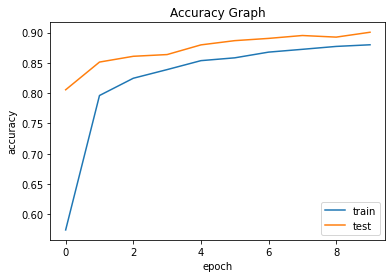

In [ ]:
#Accuracy Graph
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'bottom left')
plt.savefig('/content/Accuracy Graph')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


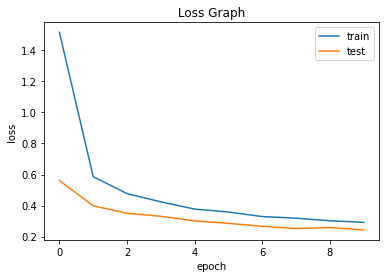

In [ ]:
#Loss Graph
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'bottom left')
plt.savefig('/content/Loss Graph')

In [ ]:
!wget "https://res.cloudinary.com/dovxlbprt/image/upload/v1554301451/sign_board.png"

--2020-05-27 00:16:03--  https://res.cloudinary.com/dovxlbprt/image/upload/v1554301451/sign_board.png
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58638 (57K) [image/png]
Saving to: ‘sign_board.png’

sign_board.png      100%[===================>]  57.26K  --.-KB/s    in 0.09s   

2020-05-27 00:16:05 (649 KB/s) - ‘sign_board.png’ saved [58638/58638]



In [ ]:
!mkdir -p final_char_images

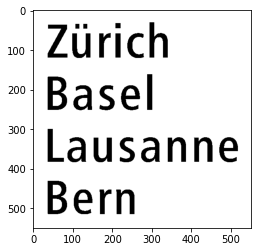

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread("./sign_board.png")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

offset = 50

first_half = grey_img[offset:-offset, offset:grey_img.shape[1]//2]
second_half = grey_img[offset:-offset, grey_img.shape[1]//2:-offset]

_, thresh_half1 = cv2.threshold(first_half, 200, 255, cv2.THRESH_BINARY_INV)
_, thresh_half2 = cv2.threshold(second_half, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh_half1, cmap="gray")
plt.show()

In [ ]:
 """

Now, the first image corresponds to the places with their names
So, I will extract the characters from that image by applying some operations related to contours

"""

'\n\nNow, the first image corresponds to the places with their names\nSo, I will extract the characters from that image by applying some operations related to contours\n\n'

In [ ]:

contours, _ = cv2.findContours(thresh_half1.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
#### Sorting the contours on the basis of their areas
sorted_contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

### Finding the index of the contour from where non-english character contours start showing up
for i in range (len(sorted_contours)):
    if (cv2.contourArea(sorted_contours[i+1])<800 
        and (cv2.contourArea(sorted_contours[i])-cv2.contourArea(sorted_contours[i+1]) >= 300)):
        break

In [ ]:
### Iterating throughout the sorted contours from the second contour to the i-th contour
### Ignored 1st contour - Because it corresponds to the whole window or bounding box of the image
### Ignored every contour after i-th index - Because it all the contours after that index correspond to non-english symbols


In [ ]:
## Making a list (char_bases) of the positions of the base of each character (contour)
char_bases = []

for c in sorted_contours[1:i+1]:
    x, y, w, h = cv2.boundingRect(c)
    char_bases.append(y+h)


In [ ]:
## Grouping the bases on the basis of alignment i.e. base pixels in same line will be grouped together in a sublist
char_bases = sorted(list(set(char_bases)))
# Garbage value addition - so that the last position doesn't get ignored
char_bases.append(999999)
char_grouped_bases = []
i=0
while i<len(char_bases)-1:
  group_base = []
  for j in range(i, len(char_bases)):
    if char_bases[j] - char_bases[i] > 3:
      break
    else:
      group_base.append(char_bases[j])
  char_grouped_bases.append(group_base)
  i = j
print(char_grouped_bases)

[[121, 122], [253, 254], [384, 385], [516]]


In [ ]:
lined_contours = []
## Function for finding the horizontal position of the contour
## This function will be used to sort contours in a same line on the basis of their
## position because right now they are jumbled.
def x_cord_of_contour(contour):
    moment_mat = cv2.moments(contour)
    return int(moment_mat['m10']/moment_mat['m00'])

for group in char_grouped_bases:
  lined_ctr = []
  for base_pt in group:
    for c in contours:
      if (cv2.boundingRect(c)[1]+cv2.boundingRect(c)[3] == base_pt):
        lined_ctr.append(c)
  lined_ctr = sorted(lined_ctr, key=lambda x: x_cord_of_contour(x))
  lined_contours.append(lined_ctr)


In [ ]:
## Saving the final images of each character (preprocessed) in the final_char_images folder
## Name of every character's saved image will look something like - <line1-char1.png>
for i in range(len(lined_contours)):
        for j in range(len(lined_contours[i])):
                c = lined_contours[i][j]
                x, y, w, h = cv2.boundingRect(c)
                char_img = thresh_half1[y:y+h, x:x+w]
                if w<100:
                        padding_width = (100-w)//2
                        padding_left = np.ones((h, padding_width), dtype=np.uint8)*255
                        padding_right = np.ones((h, padding_width), dtype=np.uint8)*255
                        half_padded_horizontal = np.concatenate((padding_left, char_img), axis=1)
                        full_padded_horizontal = np.concatenate((half_padded_horizontal, padding_right), axis=1)
                        char_img = full_padded_horizontal
                if h<100:
                        padding_height = (100-h)//2
                        padding_top = np.ones((padding_height, char_img.shape[1]), dtype=np.uint8)*255
                        padding_bottom = np.ones((padding_height, char_img.shape[1]), dtype=np.uint8)*255
                        half_padded_vertical = np.concatenate((padding_top, char_img), axis=0)
                        full_padded_vertical = np.concatenate((half_padded_vertical, padding_bottom), axis=0)
                        char_img = full_padded_vertical
                current_cropped_img = cv2.resize(char_img, (64, 64))
                cv2.imwrite("./final_char_images/line{}-char{}.png".format(i+1,j+1), current_cropped_img)
                cv2.rectangle(first_half, (x, y), (x + w, y + h), color=15*i, thickness=2)


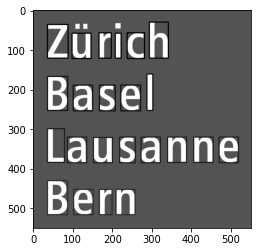

In [ ]:
## Displaying the first half with contours highlighted
plt.imshow(first_half, cmap="gray")
plt.show()

In [ ]:
!ls final_char_images

line1-char1.png  line2-char1.png  line3-char2.png  line3-char8.png
line1-char2.png  line2-char2.png  line3-char3.png  line4-char1.png
line1-char3.png  line2-char3.png  line3-char4.png  line4-char2.png
line1-char4.png  line2-char4.png  line3-char5.png  line4-char3.png
line1-char5.png  line2-char5.png  line3-char6.png  line4-char4.png
line1-char6.png  line3-char1.png  line3-char7.png


In [ ]:
final_paths = glob.glob("./final_char_images/*.png")
print (final_paths)

['./final_char_images/line3-char7.png', './final_char_images/line3-char2.png', './final_char_images/line3-char8.png', './final_char_images/line1-char2.png', './final_char_images/line2-char2.png', './final_char_images/line2-char3.png', './final_char_images/line4-char1.png', './final_char_images/line1-char4.png', './final_char_images/line4-char3.png', './final_char_images/line3-char3.png', './final_char_images/line2-char4.png', './final_char_images/line1-char3.png', './final_char_images/line1-char5.png', './final_char_images/line3-char6.png', './final_char_images/line3-char1.png', './final_char_images/line3-char4.png', './final_char_images/line4-char2.png', './final_char_images/line4-char4.png', './final_char_images/line2-char5.png', './final_char_images/line1-char6.png', './final_char_images/line3-char5.png', './final_char_images/line1-char1.png', './final_char_images/line2-char1.png']


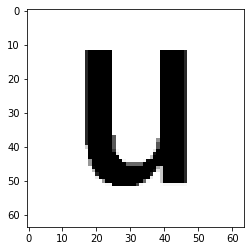

In [ ]:
sample = cv2.imread("./final_char_images/line1-char2.png",0)
plt.imshow(sample, cmap="gray")
plt.show()

In [ ]:
img = cv2.imread("./final_char_images/line1-char6.png", 0)
img = img.reshape(1, 64, 64, 1)
softmax_output = model.predict(img)
print ("Softmaxed output: {}".format(softmax_output))
output = np.where(softmax_output == softmax_output.max())
print ("Predicted class: {}".format(output[1][0]+1))

Softmaxed output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted class: 44


In [ ]:
def class2char(class_num):
  class_num+=1
  if (class_num>10 and class_num<=36):
    return chr(class_num+54)
  elif (class_num>36 and class_num<=62):
    return chr(class_num+60)
  else:
    return chr(class_num+48)

In [ ]:
final_paths = sorted(final_paths)
n_groups = int(final_paths[-1].split("line")[-1].split("-")[0])
grouped_final_chars = [[] for i in range(n_groups)]
  
for path in final_paths:
  group = int(path.split("line")[-1].split("-")[0])-1                   
  char = cv2.imread(path, 0)
  char = char.reshape(1, 64, 64, 1)
  softmax_output = model.predict(char)
  output = np.where(softmax_output == softmax_output.max())
  grouped_final_chars[group].append(class2char(output[-1][0]))
  
print (grouped_final_chars)


[['Z', 'u', 'r', 'l', 'c', 'h'], ['B', 'a', 'S', 'e', 'l'], ['L', 'a', 'u', 'S', 'a', 'n', 'n', 'e'], ['B', 'e', 'r', 'n']]


In [ ]:
places = ["".join(x).capitalize() for x in grouped_final_chars]

In [ ]:
places

['Zurlch', 'Basel', 'Lausanne', 'Bern']

In [ ]:
import requests
import json

"""
   Sample article object:


       {
           "source": {
               "id": "the-jerusalem-post",
               "name": "The Jerusalem Post"
           },
           "author": "By ANNA AHRONHEIM",
           "title": "The Day after Daesh",
           "description": "Some description.",
           "url": "https://www.jpost.com/Middle-East/The-Day-after-Daesh-581005",
           "urlToImage": "https://images.jpost.com/image/upload/f_auto,fl_lossy/t_Article2016_ControlFaceDetect/426563",
           "publishedAt": "2020-05-18T12:37:02Z",
           "content": "Some content"
       }

   """


def fetch_news(place, api_key="d24740a4747e4c13bd4fe519fe659185"):
    url = "https://newsapi.org/v2/everything?q={}&from=2020-05-18&sortBy=publishedAt&apiKey={}".format(place, api_key)
    client = requests.get(url)
    output = json.loads(client.text)
    output = output["articles"]
    for out in output:
      print ("\n\nTitle: {}\n".format(out["title"]))
      #print("Author: " + out["author"] + "\n")
      print("Content: {}\n".format(out["content"]))
      print("Description: {}\n".format(out["description"]))
      print("Published On: {}\n".format(out["publishedAt"].split("T")))


In [ ]:
news = [fetch_news("Delhi") ]



Title: "Are You A Monkey?": KJo's Question To Twins Backfires Spectacularly

Content: Karan Johar shared this video. (courtesy karanjohar)
Highlights
<ul><li>Karan Johar was called a "monkey" by Yash
</li><li>KJo wrote, "lockdown with the Johars"
</li><li>The video also featured Roohi</li></ul>
New Delhi: Filmmaker Karan Johar, who is bac… [+2020 chars]

Description: "Ok I have a new name now," wrote Karan Johar

Published On: ['2020-05-18', '15:14:25Z']



Title: Government speeding up development of border infra: Defence Ministry

Content: New Delhi: The Defence ministry on Monday said key recommendations of a high-level panel to speed up creation of key infrastructure along the border areas are being implemented. A committee headed by Lt Gen DB Shekatkar (retd) recommended a series of reforms … [+2043 chars]

Description: In the last few years, the government has been focusing on enhancing road networks along the country's nearly 3,500 KM border with China.

Published On: ['2020-0